<a href="https://colab.research.google.com/github/tlyonsWIT/Mathematical-Methods/blob/main/Mathematical%20Methods%20-%20Workbook%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Methods - Python Workbook 4

## B Sc (H) Applied Computing - Year 2  

# South East Technological University - Waterford

---
 

# Topic 2 - Vectors in 3-dimensions (3D)

## Items Covered:

1. Cross Products & Perpendicular Vectors

2. The Equation of a Plane

3. Surface Plots



## Calling the python libraries and functions


* In the cell below the necessary Python libraries and functions are imported, which will be needed for the current work book


In [1]:
import matplotlib.pyplot as plt  ## Library of functions for 2D plotting
import numpy as np ## Library of function for numerical work

from mpl_toolkits.mplot3d import Axes3D # Import the functions for creating 3D plots

from ipywidgets import widgets, interact, interactive, fixed, interact_manual # Import widgets for interactive plots
from IPython.display import clear_output # A function to clear interactive plots before each update

from matplotlib import animation # A function to create an animation
from IPython.display import HTML # For creating HTML animation whcih can be displayed directly in the browser / Colab notebook

---


## Item 1 - Cross Products & Perpendicular Vectors

### Item 1(a) - The Cross  Product

* During lectures we saw that the __cross product__ of the vectors
$$
\vec{u} = u_{1}\hat{\imath} + u_{2}\hat{\jmath} + u_{3}\hat{k} \qquad
\vec{v} = v_{1}\hat{\imath} + v_{2}\hat{\jmath} + v_{3}\hat{k}
$$
is given by the __matrix determinant__
$$
\vec{n} = \vec{u}\times \vec{v} = \begin{Vmatrix}
                                    \hat{\imath} & \hat{\jmath} & \hat{k} \\
                                    u_{1} & u_{2} & u_{3} \\
                                    v_{1} & v_{2} & v_{3}
                                  \end{Vmatrix}   
$$

* There is built-in function called __np.cross()__ in python which will calculate this cross product directly for us


* However, __np.cross()__ needs two 3D arrays (i.e. a pair 3D vectors) as inputs


* To make life easier, we will create a function called __v3d()__ which will allow us to create 3D vectors easily, much like the function __v2d()__ we were using in workbooks 1 - 3





In [27]:
# A function to create 3D vectors and points

def v3d(a,b,c): # a,b,c represent the components of a vector or the coordinates of a point in 3D
    return np.array([a,b,c])

## __Eample__ 1(a) 

 Given the vectors
$$
\vec{u} = 2\hat{\imath} + \hat{\jmath} -5\hat{k} \qquad \vec{v} = -\hat{\imath} +4\hat{\jmath} + 2\hat{k}
$$

* Use __np.cross()__ to find the vector $\vec{n} = \vec{u}\times\vec{v}$

* Check that $\vec{v}\times \vec{u}  = - \vec{u}\times \vec{v} = -\vec{n}$

* Plot the vectors $\vec{u}$, $\vec{v}$, $\vec{n}$ and $-\vec{n}$

* Find the area of the parallelogram formed by $\vec{u}$ and $\vec{v}$

__Solution__

* We first define the vectors usinf __v3d()__

In [4]:
u=v3d(2,1,-5)
v=v3d(-1,4,2)
u,v

(array([ 2,  1, -5]), array([-1,  4,  2]))

* The cross-product of the vectors is 

In [6]:
n=np.cross(u,v)
n

array([22,  1,  9])

* Reversing the order of $\vec{u}$ and $\vec{v}$ we find 

In [7]:
np.cross(v,u)

array([-22,  -1,  -9])

* So we see that 
$$
\vec{v} \times \vec{u} = - \vec{u} \times \vec{v} 
$$

### 3D plots

* Since we are now dealing with 3D vectors, we will need to plot them using the 3D plot commands from matplotlib


* A system of 3D axes is set-up using one extra line of code shown below:
__ax = fig.gca(projection='3d')__


* __gca__ is a general command which means __g__et __c__urrent __a__xes

* The option __projection = '3d'__ indicates the environment __ax__ should use 3D plotting commands as opposed to the usual 2D plotting tools

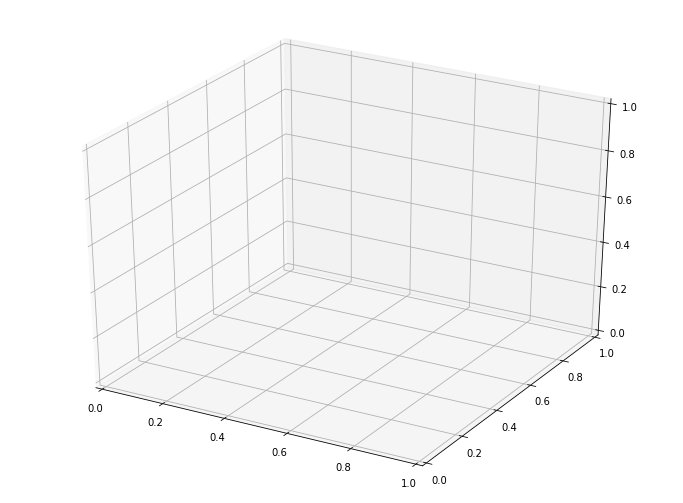

In [9]:
fig = plt.figure(figsize=(12,9)) # Create a figure environment we call fig, make it 12" x 9" in size
ax = fig.gca(projection='3d') # Create 3D axes in this figure and call these axes ax

### Quiver in 3d

* When we use __ax.quiver()__ python knows that __ax__ is a 3D plotting environment so it should use the 3D quiver function

* __ax.quiver()__ requires at least __6__ arguments: 3 for the position of the vector and 3 for the comonents of the vector


* We will put our vectors starting at the origin $O(0,0,0)$

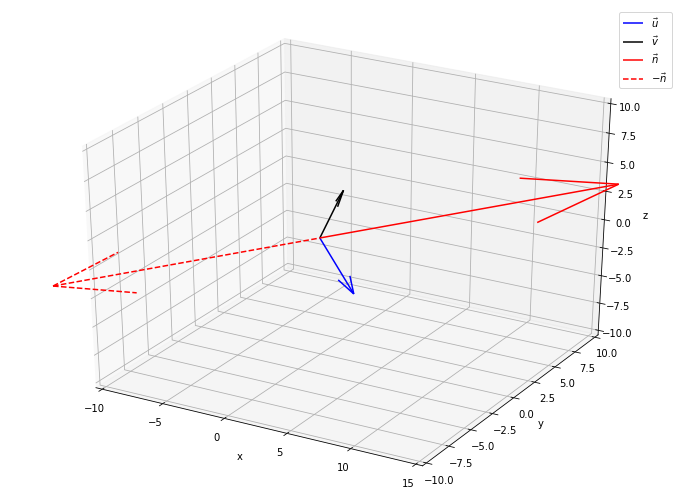

In [29]:
fig = plt.figure(figsize=(12,9)) # Create a figure environment we call fig, make it 12" x 9" in size
ax = fig.gca(projection='3d') # Create 3D axes in this figure and call these axes ax

# The command for plotting 3D vectors is similar, we just use ax.quiver() instead of plt.quiver()
ax.quiver(0,0,0,u[0],u[1],u[2],color='blue',label='$\\vec{u}$')
ax.quiver(0,0,0,v[0],v[1],v[2],color='k',label='$\\vec{v}$')
ax.quiver(0,0,0,n[0],n[1],n[2],color='red',label='$\\vec{n}$')
ax.quiver(0,0,0,-n[0],-n[1],-n[2],color='red',label='$-\\vec{n}$', ls='--')


# Setting the axis-labels is slightly different, we must use ax.set_xlabel() etc.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Setting the axis-limits is also slightly different, we must use ax.set_xlim() etc.
ax.set_xlim(-10,15)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

ax.legend()

### Rotating the plot

* As we can see, in this plot it is difficult to see that $\vec{n}$ is $\perp$ to $\vec{u}$ and $\vec{v}$.


* We can try to get a better view by changing the viewing angle with the function __ax.view_init()__

* This function takes 2 arguments: The elevation angle __elev__  and the azimuthal angle __azim__

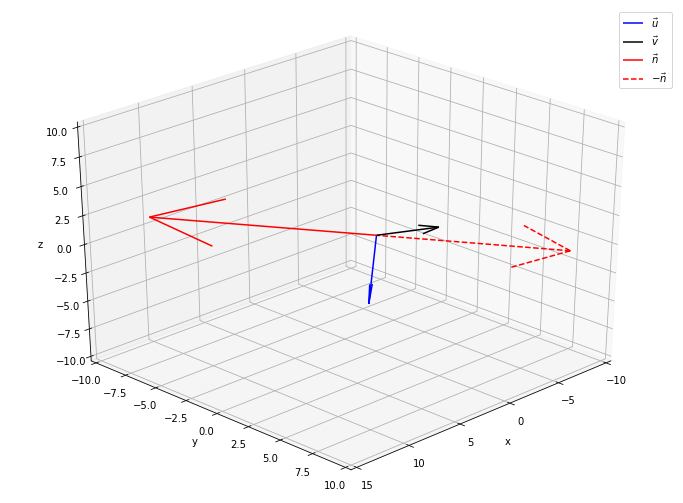

In [31]:
fig = plt.figure(figsize=(12,9)) # Create a figure environment we call fig, make it 12" x 9" in size
ax = fig.gca(projection='3d') # Create 3D axes in this figure and call these axes ax

# The command for plotting 3D vectors is similar, we just use ax.quiver() instead of plt.quiver()
ax.quiver(0,0,0,u[0],u[1],u[2],color='blue',label='$\\vec{u}$')
ax.quiver(0,0,0,v[0],v[1],v[2],color='k',label='$\\vec{v}$')
ax.quiver(0,0,0,n[0],n[1],n[2],color='red',label='$\\vec{n}$')
ax.quiver(0,0,0,-n[0],-n[1],-n[2],color='red',label='$-\\vec{n}$', ls='--')

# Setting the axis-labels is slightly different, we must use ax.set_xlabel() etc.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Setting the axis-limits is also slightly different, we must use ax.set_xlim() etc.
ax.set_xlim(-10,15)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

ax.view_init(elev=30, azim = 45)

ax.legend()

* We can even use __sliders__ to create an interactive plot which changes these viewing angles

In [30]:
@interact(el=(0,360,5) , az = (0,360,5)) # Create an interact environment with the interactive paramters el and ax going from 0 to 360 degrees in steps of 5 degrees

def MovingPlot1(el=45, az=45): # Define a new environment and initialise the parameter to t=0
    fig = plt.figure(figsize=(12,9)) # Create a figure environment we call fig, make it 12" x 9" in size
    ax = fig.gca(projection='3d') # Create 3D axes in this figure and call these axes ax

    # The command for plotting 3D vectors is similar, we just use ax.quiver() instead of plt.quiver()
    ax.quiver(0,0,0,u[0],u[1],u[2],color='blue',label='$\\vec{u}$')
    ax.quiver(0,0,0,v[0],v[1],v[2],color='k',label='$\\vec{v}$')
    ax.quiver(0,0,0,n[0],n[1],n[2],color='red',label='$\\vec{n}$')
    ax.quiver(0,0,0,-n[0],-n[1],-n[2],color='red',label='$-\\vec{n}$', ls='--')

    # Setting the axis-labels is slightly different, we must use ax.set_xlabel() etc.
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Setting the axis-limits is also slightly different, we must use ax.set_xlim() etc.
    ax.set_xlim(-10,15)
    ax.set_ylim(-10,10)
    ax.set_zlim(-10,10)

    ax.view_init(elev=el, azim = az)

    ax.legend()

interactive(children=(IntSlider(value=45, description='el', max=360, step=5), IntSlider(value=45, description=…

## Finding the Area

* We know that the norm of 3D vector is given by
$$
\Vert\vec{u}\Vert = \sqrt{u_{1}^2 + u_{2}^2 + u_{3}^2 } = \sqrt{\vec{u}\cdot\vec{u}}
$$

* We can easily create this function using the numpy commands __.dot()__ and __np.sqrt()__


In [32]:
def norm(u):
    return np.round(np.sqrt(u.dot(u)),4) # We will round our answers to 4 d.p.

* The area spanned by $\vec{u}$ and $\vec{v}$ is the norm of the vector $\vec{n} = \vec{u} \times \vec{v}$

In [33]:
norm(n)

23.7908

## _Exercise_ 1(a)

 Given the vectors
$$
\vec{u} = -\hat{\imath} + 3\hat{\jmath} + 2\hat{k} \qquad \vec{v} = 2\hat{\imath} - 6\hat{\jmath} + \hat{k}
$$

* Use __np.cross()__ to find the vector $\vec{n} = \vec{u}\times\vec{v}$

* Check that $\vec{v}\times \vec{u}  = - \vec{u}\times \vec{v} = -\vec{n}$

* Create an interactive plot the vectors $\vec{u}$, $\vec{v}$, $\vec{n}$ and $-\vec{n}$ and find the best viewing angle

* Find the area of the parallelogram formed by $\vec{u}$ and $\vec{v}$

---

# Item 1(b) - Perpendicular Vectors

* We have seen that perpendicular vectors always have __zero__ dot product

* This is true in either 2D or 3D

* We can see from __Example__ 1(a) that the vector $\vec{n} = \vec{u}\times\vec{v}$ is perpendendicular to __both__ $\vec{u}$ and $\vec{v}$

* We can show this mathematically by confirming 
$$
\vec{n}\cdot\vec{u} = \vec{n}\cdot\vec{v} = 0
$$
using the __.dot()__ function

## __Example__ 1(b)

* Given the vectors
$$
\vec{u} = 1.3\hat{\imath} - 4.7\hat{\jmath} - 5.2\hat{k} 
\qquad 
\vec{v} = -5.6\hat{\imath} + 1.2\hat{\jmath} + 5.1\hat{k}
$$

* Find the __n__ormal vector $\vec{n} = \vec{u} \times \vec{v} $

* Show that $\vec{n}$ is $\perp$ to both $\vec{u}$ and $\vec{v}$

* Find the vector sum
$$
\vec{r} = 2.4\vec{u} + 5.6\vec{v}
$$


* Show that $\vec{n}$ is also $\perp$ to the vector combination $\vec{r}$

__Solution__

* We use __v3d()__ to define the vectors __u__ and __v__

In [34]:
u = v3d(1.3, -4.7, -5.2)
v = v3d(-5.6, 1.2, 5.1)
u,v

(array([ 1.3, -4.7, -5.2]), array([-5.6,  1.2,  5.1]))

* The normal vector (i.e. the cross-product) is found using __np.cross()__

In [35]:
n = np.cross(u, v)
n

array([-17.73,  22.49, -24.76])

* Taking the dot-products $\vec{n}\cdot\vec{u}$ and $\vec{n}\cdot\vec{v}$ we find 

In [36]:
n.dot(u), n.dot(v)

(0.0, -1.4210854715202004e-14)

* The second number is $-1.4210854715202004\times 10^{-14}$, which is a rounding error because the components of __v__ cannot be represented with a finite binary sequence

* So the dot-product is in fact zero as required


* This confirms __u__ and __v__ are both $\perp$ to __n__

* The vector combination is given by

In [37]:
r = 2.4*u + 5.6*v
r

array([-28.24,  -4.56,  16.08])

* We now have

In [38]:
n.dot(r)

-5.684341886080802e-14

* Again, this number is very close to zero and is non-zero only because of rounding errors

* This confirms __n__ is $\perp$ to the combination __r = 2.4u + 5.6v__

* In fact, __n__ will be $\perp$ to any such combination of __u__ and __v__

## _Exercise_ 1(b)

* Given the vectors
$$
\vec{u} = 5.2\hat{\imath} + 6.8\hat{\jmath} + 7.2\hat{k} 
\qquad 
\vec{v} = 5.6\hat{\imath} - 10.2\hat{\jmath} - 3.8\hat{k}
$$

* Find the __n__ormal vector $\vec{n} = \vec{u} \times \vec{v} $

* Show that $\vec{n}$ is $\perp$ to both $\vec{u}$ and $\vec{v}$

* Find the vector sums
$$
\vec{q} = -13.6\vec{u} + 34.7\vec{v} \qquad \vec{r} = 724.7\vec{u} - 456.8\vec{v} 
$$


* Show that $\vec{n}$ is also $\perp$ to the vector combinations $\vec{q}$ and  $\vec{r}$

---

 # Item 2 - The equation of a plane
 
* If we are given a pair of vectors $\vec{u}$ and $\vec{v}$, then we can consider vector combinations of the form
$$
\vec{r} = \alpha \vec{u} + \beta\vec{v}
$$
where $\alpha$ and $\beta$ are any numbers


* Every such combination of $\vec{u}$ and $\vec{v}$ form a plane in 3D space


* The vector $\vec{n} = \vec{u}\times\vec{v}$ is perpendicualr to this plane (see __Example__ 1(b) and _Exercise_ 1(b))


* So if we are given a base-point $B(a,b,c)$ and another point $P(x,y,z)$ in the plane, then the vector
$$
\vec{BP} = P-B = (x-a)\hat{\imath} +  (y-b)\hat{\jmath} + (z-c)\hat{k}
$$
is also in the plane


* This means $\vec{n}=n_{1}\hat{\imath} + n_{2}\hat{\jmath} + n_{3}\hat{k}$ is $\perp$ to $\vec{BP}$, so we have 
$$
n_{1}(x-a) + n_{2}(y-b) + n_{3}(z-c) = 0
$$


* For the purposes of plotting this surface, we want to find $z$ on its own, so we have
$$
-n_{1}(x-a) - n_{2}(y-b) = n_{3}(z-c)
$$


* Dividing by $n_{3}$ now gives
$$
-\frac{n_{1}}{n_{3}}(x-a) - \frac{n_{2}}{n_{3}}(y-b) = z-c,
$$
and bringing $c$ to the left gives
$$
c-\frac{n_{1}}{n_{3}}(x-a) - \frac{n_{2}}{n_{3}}(y-b) = z,
$$


## A funtion to plot surfaces

* We can use the result above to plot a surface spanned by vectors $\vec{u}$ and $\vec{v}$ containing the base-point $B(a,b,c)$ as follows

In [50]:
def Z(x,y,u,v,B): # The function requires 2 vectors u & v and a base-point B and x,y-coordinates
    n1,n2,n3=np.cross(u,v)
    a,b,c = B
    z=c-n1/n3*(x-a)-n2/n3*(y-b)
    return np.round(z,4) # The function rounds to 4 d.p.

## __Example__ 2

* A plane is spanned by the vectors
$$
\vec{u} = 4\hat{\imath} - 3\hat{\jmath} + 2\hat{k}
\qquad
\vec{v} = 2\hat{\imath} + 3\hat{\jmath}  - 7\hat{k}
$$
and contains the base-point $B(-1,4,3)$ 


* Find the z-coordinate of thus plane at the following $(x,y)$-cordinates 
    * $(x,y) = (-1.4,5.6)$
    * $(x,y) = (14.5,21.6)$
    * $(x,y) = (2883,-1994)$


__Solution__

In [46]:
u = v3d(4,-3,2)
v = v3d(2,3,-7)
B = v3d(-1,4,3)

In [47]:
x,y = -1.4 , 5.6
Z(x,y,u,v,B)

0.4889

* The coordinates of on the plane are $(x,y,z) = (-1.4, 5.6, 0.4889)$

-

In [48]:
x,y = 14.5 , 21.6
Z(x,y,u,v,B)

-41.2056

* The coordinates of on the plane are $(x,y,z) = (14.5, 21.6, -41.2056)$

-

In [49]:
x,y = 2883 , -1994
Z(x,y,u,v,B)

1151.6667

* The coordinates of on the plane are $(x,y,z) = (2883, -1994, 1151.6667)$

-

* Hence, the function __Z()__ gives the z-coordinate of the plane at any x,y-coordinates

## _Exercise_ 2

* A plane is spanned by the vectors
$$
\vec{u} = 14\hat{\imath} + 23\hat{\jmath} - 12\hat{k}
\qquad
\vec{v} = 22\hat{\imath} - 15\hat{\jmath}  + 17\hat{k}
$$
and contains the base-point $B(10,24,-13)$ 


* Find the z-coordinate of thus plane at the following $(x,y)$-cordinates 
    * $(x,y) = (-24,32)$
    * $(x,y) = (54.5,-27.6)$
    * $(x,y) = (108,245)$

---

# Item 3 - Surface plots

* We can now use the function __Z()__ to plot the surface spanned by $\vec{u}$ and $\vec{v}$ containing $B$

* We have seen that this function also requires $x$ and $y$ coordinates, which then gives the corresponding $z$ coordinate in the plane

* The create a plot of a surface, we need to create a __np.meshgrid()__ which is basically a copy of the $(x,y)-$plane


## __Example__ 3

Given the vectors
$$
\vec{u} = 2.3\hat{\imath} + 1.3\hat{\jmath} + 4.2\hat{k}
\qquad
\vec{v} = 5.2\hat{\imath} + 6.3\hat{\jmath}  + 9.7\hat{k}
$$
and contains the base-point $B(4.5,1.5,-6.7)$ answer the following:

* Use __np.linspace()__ to create an $x$-axis 10-units either side of the base point

* Use __np.linspace()__ to create an $y$-axis 10-units either side of the base point


* Use __np.meshgrid()__ to create an $(x,y)$-plane using these axes


* Use the function __Z()__ to plot the surface spanned by $\vec{u}$, $\vec{v}$ containing $B$


* Show the vectors $\vec{u}$, $\vec{v}$, $\vec{n}$ and $B$ on this plane


* Show the point
$$
P = B + 0.75\vec{u} + 1.1\vec{v}
$$
on this plot also

__Solution__

* We create $\vec{u}$, $\vec{v}$, $\vec{n}$, $P$ and $B$ using __v3d()__ and __np.cross()__

In [130]:
u = v3d(2.3, 1.3, 4.2)
v = v3d(5.2, 6.3, 9.7)
n=np.cross(u,v)
B = v3d(4.5, 1.5, -6.7)
P = B + 0.75*u + 1.1*v
u,v,n,B,P

(array([2.3, 1.3, 4.2]),
 array([5.2, 6.3, 9.7]),
 array([-13.85,  -0.47,   7.73]),
 array([ 4.5,  1.5, -6.7]),
 array([11.945,  9.405,  7.12 ]))

* We create the __x__ and __y__ axes as follows:

In [131]:
a,b,c=B
px,py,pz=P

In [132]:
X = np.linspace(a-10, a+10, 101) # The x-axis goes from 4.5-10 to 4.5+10 with 101 point
Y = np.linspace(b-10, b+10, 101) # The y-axis goes from 1.5-10 to 1.5+10 with 101 point

x,y = np.meshgrid(X,Y)  # The (x,y) coordinates are formed by combining X and Y in pairs - There are 101 x 101 = 10201 point in this x,y-plane

* The surface is plotted over this __x,y__-meshgrid using the function __Z()__ and the matplotlib function __ax.plot_surface()__

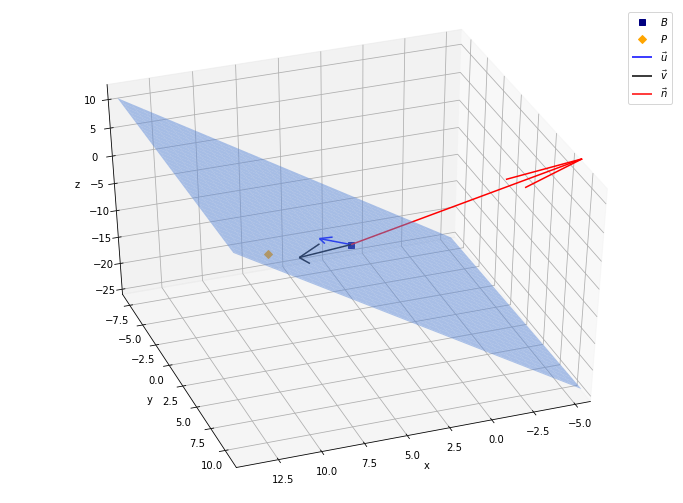

In [139]:
fig = plt.figure(figsize=(12,9)) # Create a figure environment we call fig, make it 12" x 9" in size
ax = fig.gca(projection='3d') # Create 3D axes in this figure and call these axes ax

# The surface is plotted using the function below
ax.plot_surface(x, y, Z(x,y,u,v,B), color='cornflowerblue', alpha =0.5)

# The command for plotting 3D vectors is similar, we just use ax.quiver() instead of plt.quiver()
ax.quiver(a, b, c, u[0], u[1], u[2], color='blue', label='$\\vec{u}$')
ax.quiver(a, b, c, v[0], v[1], v[2], color='k', label='$\\vec{v}$')
ax.quiver(a, b, c, n[0], n[1], n[2], color='red', label='$\\vec{n}$')

# The points are plotted using ax.plot() as follows N.B. note the square brackets [] !!
ax.plot([a], [b], [c], 's', color='navy', label='$B$')
ax.plot([px], [py], [pz], 'D', color = 'orange', label='$P$' )

# Setting the axis-labels is slightly different, we must use ax.set_xlabel() etc.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Setting the axis-limits is also slightly different, we must use ax.set_xlim() etc.
ax.set_xlim(a-10, a+10)
ax.set_ylim(b-10, b+10)
    
ax.view_init(elev=40, azim=70)

ax.legend()

## _Exercise_ 3

Given the vectors
$$
\vec{u} = 1.3\hat{\imath} - 2.1\hat{\jmath} - 1.2\hat{k}
\qquad
\vec{v} = -1.4\hat{\imath} - 2.3\hat{\jmath}  + 1.7\hat{k}
$$
and contains the base-point $B(1.1,2.1,1.2)$ answer the following:

* Use __np.linspace()__ to create an $x$-axis 10-units either side of the base point

* Use __np.linspace()__ to create an $y$-axis 10-units either side of the base point


* Use __np.meshgrid()__ to create an $(x,y)$-plane using these axes


* Use the function __Z()__ to plot the surface spanned by $\vec{u}$, $\vec{v}$ containing $B$


* Show the vectors $\vec{u}$, $\vec{v}$, $\vec{n}$ and $B$ on this plane


* Show the point
$$
P = B + 1.25\vec{u} - 0.8\vec{v}
$$
on this plot also